Problem 1a)

Using device: cuda
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20: Loss=2.1002, Train Acc=21.07%, Val Acc=31.92%
Epoch 2/20: Loss=1.9771, Train Acc=25.54%, Val Acc=34.56%
Epoch 3/20: Loss=1.9409, Train Acc=27.21%, Val Acc=36.28%
Epoch 4/20: Loss=1.9211, Train Acc=27.48%, Val Acc=35.91%
Epoch 5/20: Loss=1.9012, Train Acc=28.01%, Val Acc=35.87%
Epoch 6/20: Loss=1.8939, Train Acc=28.70%, Val Acc=36.00%
Epoch 7/20: Loss=1.8788, Train Acc=28.78%, Val Acc=36.87%
Epoch 8/20: Loss=1.8762, Train Acc=29.55%, Val Acc=37.30%
Epoch 9/20: Loss=1.8681, Train Acc=29.37%, Val Acc=36.51%
Epoch 10/20: Loss=1.8644, Train Acc=29.69%, Val Acc=36.17%
Epoch 11/20: Loss=1.8644, Train Acc=29.74%, Val Acc=36.82%
Epoch 12/20: Loss=1.8559, Train Acc=29.54%, Val Acc=36.63%
Epoch 13/20: Loss=1.8567, Train Acc=30.17%, Val Acc=37.07%
Epoch 14/20: Loss=1.8469, Train Acc=30.22%, Val Acc=37.26%
Epoch 15/20: Loss=1.8459, Train Acc=30.52%, Val Acc=36.92%
Epoch 16/20: Loss=1.8486, Tra

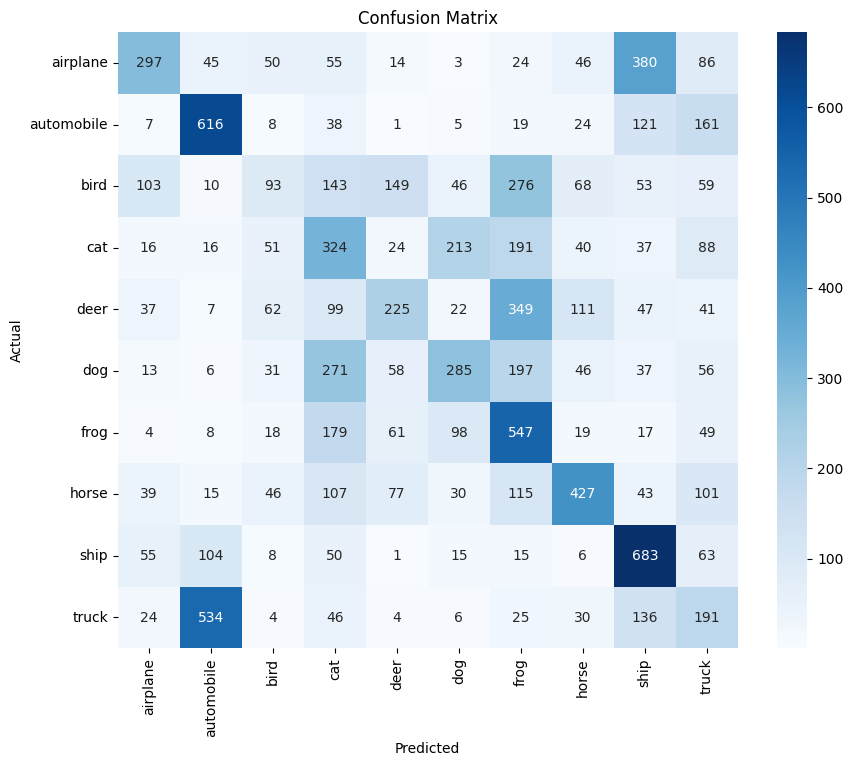

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Hyperparameters
input_size = 32 * 32 * 3  # 3072 pixels
hidden_sizes = [32, 16, 8]
output_size = 10
num_epochs = 20
batch_size = 64
learning_rate = 0.001

# Data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.fc4 = nn.Linear(hidden_sizes[2], output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)  # Reduce overfitting

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

# Initialize model
model = MLP(input_size, hidden_sizes, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training Loop
train_losses, train_accuracies, val_accuracies = [], [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_acc = 100 * correct / total
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}: Loss={train_loss:.4f}, Train Acc={train_acc:.2f}%, Val Acc={val_acc:.2f}%")

# Save model
torch.save(model.state_dict(), "cifar10_mlp.pth")

# Evaluate Model
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Classification Report & Confusion Matrix
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=train_dataset.classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Problem 1b)

Using device: cuda
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20: Loss=2.0210, Train Acc=24.72%, Val Acc=36.20%
Epoch 2/20: Loss=1.8688, Train Acc=31.66%, Val Acc=40.32%
Epoch 3/20: Loss=1.8015, Train Acc=35.01%, Val Acc=43.09%
Epoch 4/20: Loss=1.7596, Train Acc=36.55%, Val Acc=44.27%
Epoch 5/20: Loss=1.7314, Train Acc=37.73%, Val Acc=43.78%
Epoch 6/20: Loss=1.7041, Train Acc=38.54%, Val Acc=45.42%
Epoch 7/20: Loss=1.6864, Train Acc=39.58%, Val Acc=45.35%
Epoch 8/20: Loss=1.6769, Train Acc=40.03%, Val Acc=46.03%
Epoch 9/20: Loss=1.6548, Train Acc=40.75%, Val Acc=46.24%
Epoch 10/20: Loss=1.6466, Train Acc=40.82%, Val Acc=45.89%
Epoch 11/20: Loss=1.6337, Train Acc=41.67%, Val Acc=46.04%
Epoch 12/20: Loss=1.6256, Train Acc=41.92%, Val Acc=46.48%
Epoch 13/20: Loss=1.6169, Train Acc=42.68%, Val Acc=46.47%
Epoch 14/20: Loss=1.6114, Train Acc=42.80%, Val Acc=48.26%
Epoch 15/20: Loss=1.5992, Train Acc=43.22%, Val Acc=46.87%
Epoch 16/20: Loss=1.5923, Tra

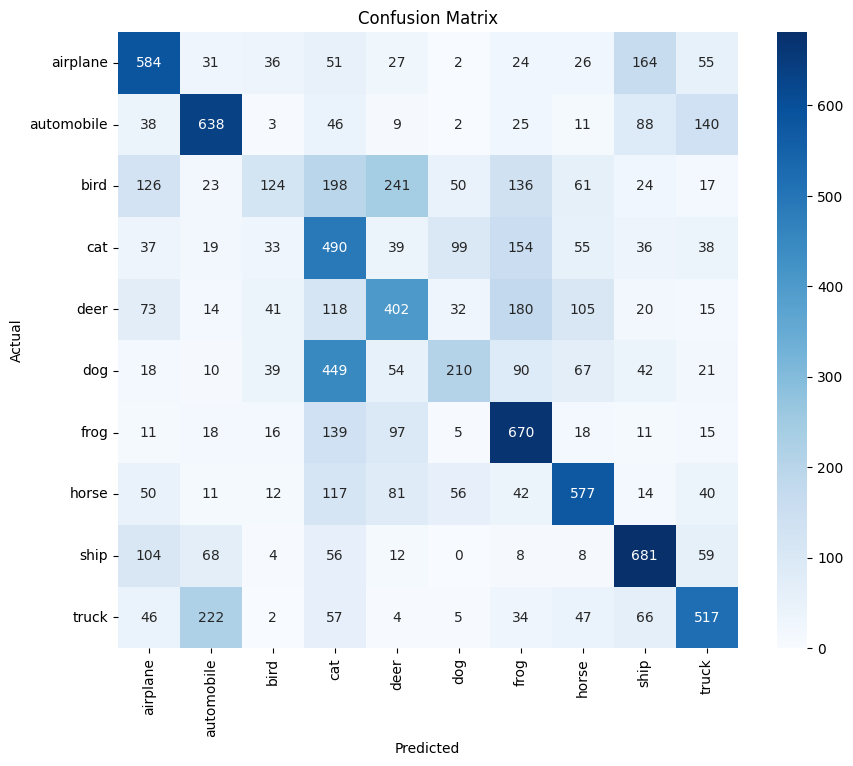

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Hyperparameters
input_size = 32 * 32 * 3  # 3072 pixels
hidden_sizes = [128, 64, 32, 16]
output_size = 10
num_epochs = 20
batch_size = 64
learning_rate = 0.001

# Data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.fc4 = nn.Linear(hidden_sizes[2], hidden_sizes[3])
        self.fc5 = nn.Linear(hidden_sizes[3], output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)  # Reduce overfitting

    def forward(self, x):
        x = self.flatten(x)  # Flatten input to (batch_size, 3072)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.fc5(x)
        return x

# Initialize model
model = MLP(input_size, hidden_sizes, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training Loop
train_losses, train_accuracies, val_accuracies = [], [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_acc = 100 * correct / total
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}: Loss={train_loss:.4f}, Train Acc={train_acc:.2f}%, Val Acc={val_acc:.2f}%")

# Save model
torch.save(model.state_dict(), "cifar10_mlp.pth")

# Evaluate Model
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Classification Report & Confusion Matrix
target_names = train_dataset.classes if hasattr(train_dataset, 'classes') else [str(i) for i in range(output_size)]
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Problem 2a)

Epoch [10/100], Train Loss: 0.0401, Test Loss: 0.0424
Epoch [20/100], Train Loss: 0.0262, Test Loss: 0.0327
Epoch [30/100], Train Loss: 0.0189, Test Loss: 0.0237
Epoch [40/100], Train Loss: 0.0157, Test Loss: 0.0229
Epoch [50/100], Train Loss: 0.0147, Test Loss: 0.0247
Epoch [60/100], Train Loss: 0.0140, Test Loss: 0.0226
Epoch [70/100], Train Loss: 0.0132, Test Loss: 0.0219
Epoch [80/100], Train Loss: 0.0135, Test Loss: 0.0227
Epoch [90/100], Train Loss: 0.0123, Test Loss: 0.0211
Epoch [100/100], Train Loss: 0.0116, Test Loss: 0.0219


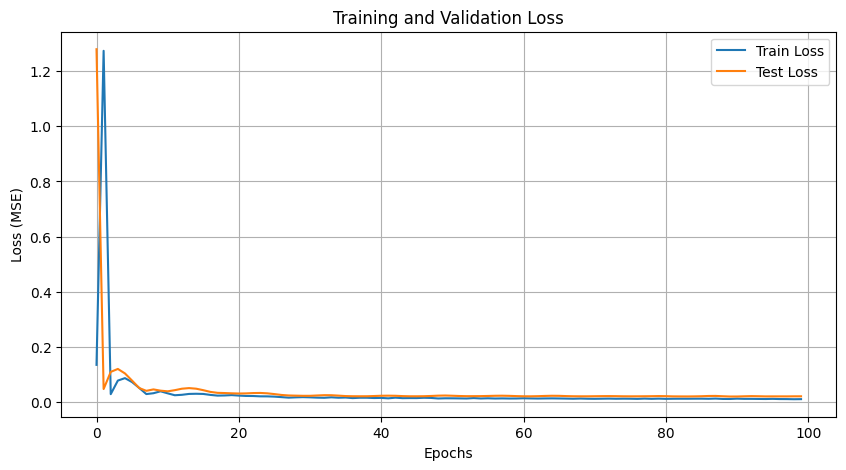

Final RMSE: 1554260.14


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = "Housing.csv"
df = pd.read_csv(file_path)

# Selecting the features and target variable
features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
target = "price"

X = df[features].values
y = df[target].values.reshape(-1, 1)

# Splitting the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features and target (Min-Max Scaling)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define the MLP Model with Dropout
class MLPRegressor(nn.Module):
    def __init__(self, input_size):
        super(MLPRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)  # Dropout with a 10% rate

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout after first layer
        x = self.relu(self.fc2(x))
        x = self.dropout(x)  # Apply dropout after second layer
        x = self.relu(self.fc3(x))
        x = self.dropout(x)  # Apply dropout after third layer
        x = self.fc4(x)  # No activation for regression
        return x


# Initialize model, loss, and optimizer
input_size = len(features)
model = MLPRegressor(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.015)

# Training the model
num_epochs = 100
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    y_pred_train = model(X_train_tensor)
    loss = criterion(y_pred_train, y_train_tensor)
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    # Evaluate on test data
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_tensor)
        test_loss = criterion(y_pred_test, y_test_tensor).item()

    train_losses.append(loss.item())
    test_losses.append(test_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10,5))
plt.plot(range(num_epochs), train_losses, label="Train Loss")
plt.plot(range(num_epochs), test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()

# Final Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()
    y_pred = scaler_y.inverse_transform(y_pred)
    y_test_original = scaler_y.inverse_transform(y_test_tensor.numpy())

rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))

print(f"Final RMSE: {rmse:.2f}") 


Problem 2b)

Epoch [10/100], Train Loss: 0.0864, Test Loss: 0.0982
Epoch [20/100], Train Loss: 0.0336, Test Loss: 0.0399
Epoch [30/100], Train Loss: 0.0186, Test Loss: 0.0268
Epoch [40/100], Train Loss: 0.0137, Test Loss: 0.0244
Epoch [50/100], Train Loss: 0.0119, Test Loss: 0.0191
Epoch [60/100], Train Loss: 0.0110, Test Loss: 0.0179
Epoch [70/100], Train Loss: 0.0111, Test Loss: 0.0198
Epoch [80/100], Train Loss: 0.0109, Test Loss: 0.0197
Epoch [90/100], Train Loss: 0.0089, Test Loss: 0.0189
Epoch [100/100], Train Loss: 0.0087, Test Loss: 0.0190


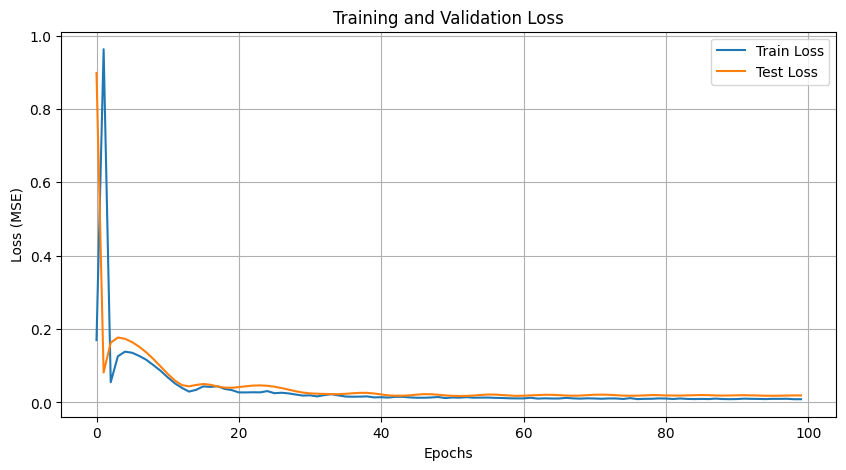

Final RMSE: 1445823.32


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = "Housing.csv"
df = pd.read_csv(file_path)

# Selecting the features and target variable
features = ["area", "bedrooms", "bathrooms", "stories", "parking", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
target = "price"

# Encoding categorical features
df["mainroad"] = df["mainroad"].map({"yes": 1, "no": 0})
df["guestroom"] = df["guestroom"].map({"yes": 1, "no": 0})
df["basement"] = df["basement"].map({"yes": 1, "no": 0})
df["hotwaterheating"] = df["hotwaterheating"].map({"yes": 1, "no": 0})
df["airconditioning"] = df["airconditioning"].map({"yes": 1, "no": 0})
df["prefarea"] = df["prefarea"].map({"yes": 1, "no": 0})
df["furnishingstatus"] = df["furnishingstatus"].map({"unfurnished": 0, "semi-furnished": 1, "furnished": 2})

X = df[features].values
y = df[target].values.reshape(-1, 1)

# Splitting the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features and target (Min-Max Scaling)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define the MLP Model with Dropout
class MLPRegressor(nn.Module):
    def __init__(self, input_size):
        super(MLPRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)  # Dropout with a 10% rate

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout after first layer
        x = self.relu(self.fc2(x))
        x = self.dropout(x)  # Apply dropout after second layer
        x = self.relu(self.fc3(x))
        x = self.dropout(x)  # Apply dropout after third layer
        x = self.fc4(x)  # No activation for regression
        return x


# Initialize model, loss, and optimizer
input_size = len(features)
model = MLPRegressor(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.015)

# Training the model
num_epochs = 100
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    y_pred_train = model(X_train_tensor)
    loss = criterion(y_pred_train, y_train_tensor)
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    # Evaluate on test data
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_tensor)
        test_loss = criterion(y_pred_test, y_test_tensor).item()

    train_losses.append(loss.item())
    test_losses.append(test_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10,5))
plt.plot(range(num_epochs), train_losses, label="Train Loss")
plt.plot(range(num_epochs), test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()

# Final Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()
    y_pred = scaler_y.inverse_transform(y_pred)
    y_test_original = scaler_y.inverse_transform(y_test_tensor.numpy())

rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))

print(f"Final RMSE: {rmse:.2f}")

Problem 2c)

Epoch [10/100], Train Loss: 0.0752, Test Loss: 0.1040
Epoch [20/100], Train Loss: 0.0339, Test Loss: 0.0454
Epoch [30/100], Train Loss: 0.0252, Test Loss: 0.0345
Epoch [40/100], Train Loss: 0.0143, Test Loss: 0.0183
Epoch [50/100], Train Loss: 0.0122, Test Loss: 0.0167
Epoch [60/100], Train Loss: 0.0103, Test Loss: 0.0191
Epoch [70/100], Train Loss: 0.0095, Test Loss: 0.0177
Epoch [80/100], Train Loss: 0.0082, Test Loss: 0.0203
Epoch [90/100], Train Loss: 0.0090, Test Loss: 0.0179
Epoch [100/100], Train Loss: 0.0072, Test Loss: 0.0167


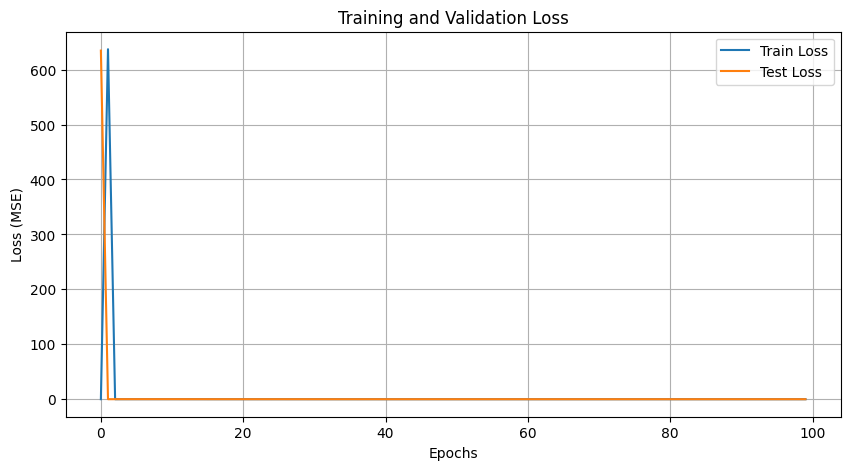

Final RMSE: 1356727.64


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = "Housing.csv"
df = pd.read_csv(file_path)

# Selecting the features and target variable
features = ["area", "bedrooms", "bathrooms", "stories", "parking", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
target = "price"

# Encoding categorical features
df["mainroad"] = df["mainroad"].map({"yes": 1, "no": 0})
df["guestroom"] = df["guestroom"].map({"yes": 1, "no": 0})
df["basement"] = df["basement"].map({"yes": 1, "no": 0})
df["hotwaterheating"] = df["hotwaterheating"].map({"yes": 1, "no": 0})
df["airconditioning"] = df["airconditioning"].map({"yes": 1, "no": 0})
df["prefarea"] = df["prefarea"].map({"yes": 1, "no": 0})
df["furnishingstatus"] = df["furnishingstatus"].map({"unfurnished": 0, "semi-furnished": 1, "furnished": 2})

X = df[features].values
y = df[target].values.reshape(-1, 1)

# Splitting the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features and target (Min-Max Scaling)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define the MLP Model with Dropout
class MLPRegressor(nn.Module):
    def __init__(self, input_size):
        super(MLPRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)  # Dropout with a 10% rate

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout after first layer
        x = self.relu(self.fc2(x))
        x = self.dropout(x)  # Apply dropout after second layer
        x = self.relu(self.fc3(x))
        x = self.dropout(x)  # Apply dropout after third layer
        x = self.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.relu(self.fc5(x))
        x = self.dropout(x)
        x = self.fc6(x)  # No activation for regression
        return x


# Initialize model, loss, and optimizer
input_size = len(features)
model = MLPRegressor(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.015)

# Training the model
num_epochs = 100
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    y_pred_train = model(X_train_tensor)
    loss = criterion(y_pred_train, y_train_tensor)
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    # Evaluate on test data
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_tensor)
        test_loss = criterion(y_pred_test, y_test_tensor).item()

    train_losses.append(loss.item())
    test_losses.append(test_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10,5))
plt.plot(range(num_epochs), train_losses, label="Train Loss")
plt.plot(range(num_epochs), test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()

# Final Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()
    y_pred = scaler_y.inverse_transform(y_pred)
    y_test_original = scaler_y.inverse_transform(y_test_tensor.numpy())

rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))

print(f"Final RMSE: {rmse:.2f}")